In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import nltk
import re
import seaborn as sns
nltk.download('stopwords') #used once to download stopwords.
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

%config InlineBackend.figure_format = 'svg'
%matplotlib inline

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\yhf\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### 数据预处理

In [5]:
data = pd.DataFrame()
label, content = [], []
with open("./smsspamcollection/SMSSpamCollection", "r", encoding="utf-8") as fp:
    email_list = fp.readlines()
for emails in email_list:
    email = emails.split("\t")
    label.append(email[0].strip())
    content.append(email[1].strip())
data["content"] = content
data["label"] = label

In [6]:
data.head()

,content,label
0,"Go until jurong point, crazy.. Available only ...",ham
1,Ok lar... Joking wif u oni...,ham
2,Free entry in 2 a wkly comp to win FA Cup fina...,spam
3,U dun say so early hor... U c already then say...,ham
4,"Nah I don't think he goes to usf, he lives aro...",ham


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5574 entries, 0 to 5573
Data columns (total 2 columns):
content    5574 non-null object
label      5574 non-null object
dtypes: object(2)
memory usage: 87.2+ KB


In [10]:
# Cleaning the data
corpus = []
for i in range(0,5574):
    smsDocument = re.sub('[^a-zA-Z]',' ',content[i])
    smsDocument = smsDocument.lower()
    smsDocument = smsDocument.split()
    ps = PorterStemmer()
    smsDocument = [ps.stem(word) for word in smsDocument if not word in set(stopwords.words('english'))]
    smsDocument = ' '.join(smsDocument)
    corpus.append(smsDocument)

In [11]:
smsDocuments = pd.Series(corpus)

In [12]:
vectorizer = CountVectorizer(max_features=3000) 
vector = vectorizer.fit_transform(smsDocuments).toarray()

In [13]:
clear_email_data = pd.DataFrame(vector, columns = vectorizer.get_feature_names())

In [14]:
clear_email_data["label"] = label

In [15]:
convert = lambda s: 1 if s == "ham" else 0
clear_email_data["label"] = clear_email_data["label"].apply(convert)

In [16]:
clear_email_data.head()

,aah,aathi,abi,abil,abiola,abj,abl,absolutli,abt,abta,...,yr,yummi,yun,yunni,yuo,yup,zed,zindgi,zoe,label
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [39]:
training_data, testing_data, y_train, y_test = train_test_split(clear_email_data.iloc[:, :-1], clear_email_data['label'], test_size=0.10, random_state=0)

### 训练模型

In [18]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn import metrics

Accuracy Score:  0.979079497908
AUC Score:  0.967170273345


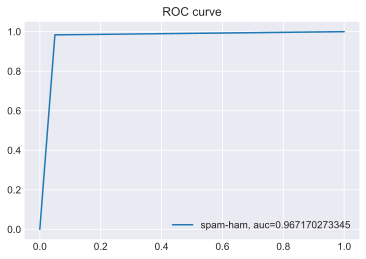

In [27]:
model = MultinomialNB() #Multinomail distribution (naive bayes classification) works better in case of counts.
model.fit(training_data, y_train)
pred = model.predict(testing_data)
accs = accuracy_score(y_test, pred)
print("Accuracy Score: ", accs)
fpr, tpr, _ = metrics.roc_curve(y_test,  pred)
auc = metrics.roc_auc_score(y_test, pred) #Find AUC score for the data set based on LR
print("AUC Score: ", auc)
_ = plt.plot(fpr, tpr, label="spam-ham, auc="+str(auc))
_ = plt.legend(loc=4)
_ = plt.title("ROC curve")

Accuracy Score:  0.982078853047
AUC Score:  0.966579621954


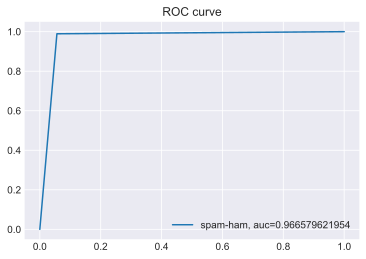

In [40]:
model = MultinomialNB() #Multinomail distribution (naive bayes classification) works better in case of counts.
model.fit(training_data, y_train)
pred = model.predict(testing_data)
accs = accuracy_score(y_test, pred)
print("Accuracy Score: ", accs)
fpr, tpr, _ = metrics.roc_curve(y_test,  pred)
auc = metrics.roc_auc_score(y_test, pred) #Find AUC score for the data set based on LR
print("AUC Score: ", auc)
_ = plt.plot(fpr, tpr, label="spam-ham, auc="+str(auc))
_ = plt.legend(loc=4)
_ = plt.title("ROC curve")

In [41]:
target_names = ['spam', 'ham']
print(classification_report(y_test, pred, target_names=target_names))

             precision    recall  f1-score   support

       spam       0.94      0.94      0.94        89
        ham       0.99      0.99      0.99       469

avg / total       0.98      0.98      0.98       558



In [91]:
def trainNB(train_data, label):
    numTrainDocs = len(train_data) 
    numWords = len(train_data[0])
    pAbusive = sum(label) / np.float(numTrainDocs) 
    p0Num = np.ones(numWords)
    p1Num = np.ones(numWords)
    p0Denom = 2.0
    p1Denom = 2.0
    for i in range(numTrainDocs):
        if label[i] == 1:
            p1Num += train_data[i] 
            p1Denom += sum(train_data[i])
        else: 
            p0Num += train_data[i]
            p0Denom += sum(train_data[i])
    p1Vec = np.log(p1Num / p1Denom)
    p0Vec = np.log(p0Num / p0Denom)
    return p0Vec, p1Vec, pAbusive  

def classifyNB(vec2Classify, p0Vec, p1Vec, pClass1): 
    p1 = sum(vec2Classify * p1Vec) + np.log(pClass1)
    p0 = sum(vec2Classify * p0Vec) + np.log(1.0 - pClass1)
    if p1 > p0:
        return 1
    else: return 0

def byes_predict(p0V, p1V, pAb):
    _predict = []
    for test_data in np.array(testing_data):
        _predict.append(classifyNB(test_data, p0V, p1V, pAb))
    return _predict

In [20]:
training_data, testing_data, y_train, y_test = train_test_split(clear_email_data.iloc[:, :-1], clear_email_data['label'], test_size=0.30, random_state=0)
p0V, p1V, pAb = trainNB(np.array(training_data), np.array(y_train))
predict = byes_predict(p0V, p1V, pAb)

Accuracy Score:  0.961147638972
AUC Score:  0.963554931823


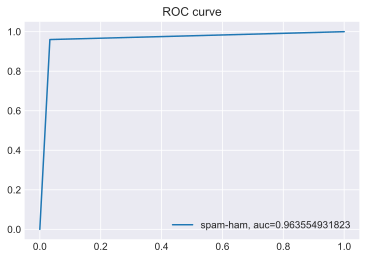

In [26]:
accs = accuracy_score(y_test, predict)
print("Accuracy Score: ", accs)
fpr, tpr, _ = metrics.roc_curve(y_test,  predict)
auc = metrics.roc_auc_score(y_test, predict) #Find AUC score for the data set based on LR
print("AUC Score: ", auc)
_ = plt.plot(fpr, tpr, label="spam-ham, auc=" + str(auc))
_ = plt.legend(loc=4)
_ = plt.title("ROC curve")

### 增量式训练 

In [56]:
training_data, testing_data, y_train, y_test = train_test_split(clear_email_data.iloc[:, :-1], clear_email_data['label'], test_size=0.10, random_state=0)

In [60]:
training_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5016 entries, 1683 to 2732
Columns: 3000 entries, aah to zoe
dtypes: int64(3000)
memory usage: 114.8 MB


In [76]:
accs = []
for i in range(1000, 5016, 1000):
    model = MultinomialNB() #Multinomail distribution (naive bayes classification) works better in case of counts.
    model.fit(training_data[:i], y_train[:i])
    pred = model.predict(testing_data)
    accs.append(accuracy_score(y_test, pred))

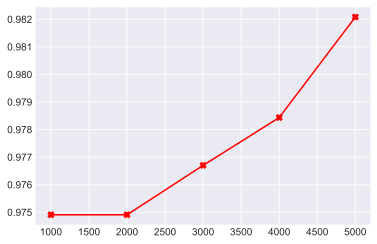

In [88]:
x = range(1000, 5016, 1000)
fig, ax = plt.subplots()
ax.plot(x, accs, 'rX-')

In [96]:
predict = []
for i in range(1000, 5016, 1000):
    p0V, p1V, pAb = trainNB(np.array(training_data)[:i], np.array(y_train)[:i])
    acc = accuracy_score(y_test, byes_predict(p0V, p1V, pAb))
    predict.append(acc)

Text(0,0.5,'accuracy')

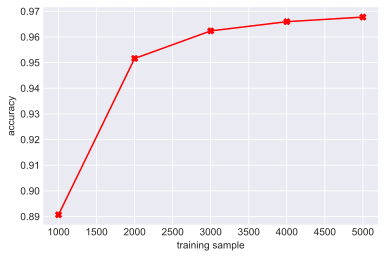

In [99]:
x = range(1000, 5016, 1000)
fig, ax = plt.subplots()
ax.plot(x, predict, 'rX-')
plt.xlabel("training sample")
plt.ylabel("accuracy")

In [31]:
from sklearn.metrics import classification_report

In [35]:
target_names = ['spam', 'ham']
print(classification_report(y_test, pred, target_names=target_names))

             precision    recall  f1-score   support

       spam       0.91      0.95      0.93       242
        ham       0.99      0.98      0.99      1431

avg / total       0.98      0.98      0.98      1673



In [106]:
from sklearn.linear_model import LogisticRegression

In [104]:
training_data, testing_data, y_train, y_test = train_test_split(clear_email_data.iloc[:, :-1], clear_email_data['label'], test_size=0.30, random_state=0)

Accuracy Score:  0.979079497908
AUC Score:  0.934552789184


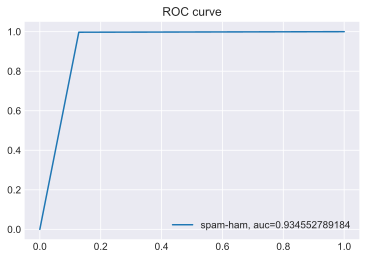

In [107]:
model = LogisticRegression()
model.fit(training_data, y_train)
pred = model.predict(testing_data)
accs = accuracy_score(y_test, pred)
print("Accuracy Score: ", accs)
fpr, tpr, _ = metrics.roc_curve(y_test,  pred)
auc = metrics.roc_auc_score(y_test, pred) #Find AUC score for the data set based on LR
print("AUC Score: ", auc)
_ = plt.plot(fpr, tpr, label="spam-ham, auc="+str(auc))
_ = plt.legend(loc=4)
_ = plt.title("ROC curve")

In [108]:
target_names = ['spam', 'ham']
print(classification_report(y_test, pred, target_names=target_names))

             precision    recall  f1-score   support

       spam       0.98      0.87      0.92       242
        ham       0.98      1.00      0.99      1431

avg / total       0.98      0.98      0.98      1673

